<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-AdrianaCamarillo-A01551139/blob/main/Actividad6_Visualizacion_A01551139.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad Semanal -- 6, visualización

## Materia: Ciencia y analítica de datos

Prof María de la Paz Rico

Prof Roberto Antonio Guevara González

## Nombre: Adriana Camarillo Duran

## Matrícula: A01551139

Fecha de entrega: 01/11/2022




In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Datos

Para esta actividad, estaremos usando una base que contiene datos sobre el cumplimiento o incumpliento de pagos de clientes que tienen tarjetas de crédito en un banco en Taiwán, así como otras características personales o de pago.

La base contiene las siguientes variables:
- Y: Cumplimiento del pago (Sí= 0, No= 1)
- X1: Monto del crédito (NT dollar)
- X2: Género (1 = masculino; 2 = femenino). 
- X3: Educación  (1 = posgrado; 2 = universitaria; 3 = preparatoria; 4 = otros). 
- X4: Estado civil (1 = casado; 2 = soltero; 3 = otros). 
- X5: Edad (año). 
- X6 - X11: Historial de pagos anteriores. Contiene datos mensuales (de Abril a Septiembre, 2005): X6 = estatus de pago en Septiembre, 2005; X7 = el estatus de pago en Agosto, 2005; . . .;X11 = estatus de pago en Abril, 2005. Las variables pueden tener los siguientes valores: -1 = pago en tiempo; 1 = retraso de pago por un mes; 2 = retraso de pago por dos meses; . . .; 8 = retraso de pago por 8 meses; 9 = retraso de pago por 9 meses o más. 
- X12-X17: Monto del estado de cuenta (NT dollar). X12 = monto en Septiembre, 2005; X13 = monto en Agosto, 2005; . . .; X17 = monto en Abril, 2005. 
- X18-X23: Monto del pago anterior (NT dollar). X18 = monto pagado en Septiembre, 2005; X19 = monto pagado en Agosto, 2005; . . .;X23 = monto pagado en Abril, 2005. 

El conjunto de datos tiene por nombre 'Credit card clientes' y pertenece a Yeh y Lien (2009).


Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

In [61]:
df= pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### Información del dataframe

In [62]:
df.shape

(30000, 25)

In [63]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

De lo anterior, podemos observar que el dataframe contiene 30,000 observaciones con 25 variables, de las cuales una es la variable objetivo (Y), 23 son variables explicatorias (X1, X2, ..., X23) y una variables es un índice o ID, por lo que no tiene mucho sentido conservarla.

También es importante notar que todas las variables son numéricas y son principalmente del tipo flotante. Además, todas las variables (a excepción de ID y X1 contienen valores nulos que deberemos tratar:

In [64]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [66]:
df.isna().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

### Limpieza del dataframe

Como se mencionó anteriormente, la mayoría de las columnas contienen valores nulos, por lo que eliminaremos las observaciones que cuenten con un valor nulo en al menos una columna.

In [67]:
df_clean= df.copy().drop('ID', axis=1).dropna()
df_clean.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### Estadística descriptiva

Ahora veremos las estadísticas de las variables:

In [68]:
df_clean[['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']].describe()

,X2,X3,X4,X6,X7,X8,X9,X10,X11
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,1.604012,1.853094,1.551739,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,-0.291575
std,0.489070,0.790471,0.521952,1.123989,1.197171,1.196026,1.168419,1.132307,1.149303
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


De acuerdo con la naturaleza de las variables X2 (Género), X3 (Educación), X4 (Estado civil), X6-X11 (Historial de estatus de pago), las cuales tienen categorías numéricas, la mayoría de las medidas de tendencia central y dispersión hacen sentido. Sin embargo, podemos observar algunas inconsistencias:
- El máximo de la variable X3 es 6 y el mínimo es 0, dichos valores no son cateogorías dentro de las válidas: 1, 2, 3, 4. 
- El mínimo de la variable X4 es 0, categoría no válida.
- El mínimo de las variables X6-X11 es -2, la cual también es una categoría inválida.

En este caso asumiremos que la categoría correcta para esos casos es la más cercana (eg. asignar el valor 4 a observaciones de X3 con 5 o 6):

In [69]:
df_clean.loc[~df_clean.X3.between(1,4),'X3']= np.where(df_clean[~df_clean.X3.between(1,4)]['X3']== 0, 1, 4)
df_clean['X4']= df_clean['X4'].replace(0, 1)
df_clean[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']]= df_clean[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']].replace(-2, -1)

Ahora, revisaremos el resto de las variables, las cuales están relacionadas con montos en dólares taiwaneses:

In [70]:
df_clean.drop(['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], axis=1).describe()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,35.483443,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,9.214319,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,34.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


El rango intercuantil, así como la media de la variable objetivo Y, nos muestra que tenemos un caso de clases desbalanceadas de aprox. 20% para la clase 1 y 80% para la clase 2.

Por parte de las variables de monto X1 (Monto del crédito), X12-X23 (Historial de montos de balance y de pagos), vemos que todas se mantienen en rangos que hacen sentido para la naturaleza de las variables, teniendo por ejemplo negativos en X12-X17, variables que tienen que ver con estados de cuenta. 

La medias de X1 y de la edad (X5) parecen sí ser representativas de los datos y no estar muy afectadas por valores atípicos, ya que son valores cercanos a sus respectivas medianas. Sin embargo, hay saltos relativamente pequeños entre los cuantiles y luego hay un salto grande hacia el máximo, lo que podría indicar que sí hay presencia de valores atípicos. 

El resto de las variables también muestran una gran diferencia entre el tercer cuantil y el máximo, por lo que también parecen tener valores atípicos.




### Variables categóricas

En la variable de género, vemos que la mayoría pertenece a la categoría 2, es decir es del género femenino

In [71]:
df_clean[['X2']].sort_values('X2').value_counts()

X2 
2.0    18095
1.0    11863
dtype: int64

La mayoría de las personas que tienen una tarjeta de crédito tienen categoría 2 o educación universitaria, seguidos por las personas con categoría 1 o posgrado:

In [72]:
df_clean[['X3']].sort_values('X3').value_counts()

X3 
2.0    14009
1.0    10586
3.0     4909
4.0      454
dtype: int64

En el caso del estado civil (X4), vemos que la población de solteros (categoría 2) y casados (categoría 1) no es tan diferente. Además, la población con algún otro estado civil, como divorciado o viudo, es mínima:

In [73]:
df_clean[['X4']].sort_values('X4').value_counts()

X4 
2.0    15939
1.0    13697
3.0      322
dtype: int64

Por último, tenemos las variables X6-X11, las cuales nos permiten observar que en cada mes la población de personas con meses de retraso en sus pagos es la minoría:

In [74]:
df_clean[['X6']].sort_values('X6').value_counts()

X6  
 0.0    14717
-1.0     8438
 1.0     3678
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
dtype: int64

In [75]:
df_clean[['X7']].sort_values('X7').value_counts()

X7  
 0.0    15709
-1.0     9820
 2.0     3918
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
dtype: int64

In [76]:
df_clean[['X8']].sort_values('X8').value_counts()

X8  
 0.0    15742
-1.0    10012
 2.0     3811
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
dtype: int64

In [77]:
df_clean[['X9']].sort_values('X9').value_counts()

X9  
 0.0    16431
-1.0    10024
 2.0     3154
 3.0      179
 4.0       69
 7.0       57
 5.0       35
 6.0        5
 1.0        2
 8.0        2
dtype: int64

In [78]:
df_clean[['X10']].sort_values('X10').value_counts()

X10 
 0.0    16925
-1.0    10074
 2.0     2618
 3.0      178
 4.0       84
 7.0       57
 5.0       17
 6.0        4
 8.0        1
dtype: int64

In [79]:
df_clean[['X11']].sort_values('X11').value_counts()

X11 
 0.0    16266
-1.0    10621
 2.0     2760
 3.0      183
 4.0       49
 7.0       46
 6.0       18
 5.0       13
 8.0        2
dtype: int64

### Escalamiento

Estandarizamos las variables de monto, para tenerlas en la misma escala:

In [80]:
scaler = StandardScaler()
 
X_scaled = df_clean.copy().drop('Y', axis= 1)
Y = df_clean[['Y']]
X_scaled[['X1', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']] = scaler.fit_transform(X_scaled[['X1', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']])
X_scaled.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137363,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-1.0,...,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


## PCA

Ahora utilizamos PCA para reducir las variables a sólo 2 componentes principales.

In [81]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X_scaled)
X_new = pd.DataFrame(X_new, columns= ['PC1', 'PC2'])
X_new

,PC1,PC2
0,-11.507589,-1.561180
1,-9.536908,-0.872240
2,-1.522222,-1.020824
3,1.505601,-0.397877
4,21.500187,-1.348828
...,...,...
29953,3.593959,2.396020
29954,7.509515,-2.117842
29955,1.440868,0.092448
29956,5.560108,0.434821


Podemos ver que con estas dos componentes principales, tenemos aproximademente el 87% de la varianza explicada:

In [82]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.81109155 0.05974955]
[85.02350274  6.263308  ]


Ahora vamos a ver los pesos otorgados a cada variable en cada componente:

In [83]:
print(abs(pca.components_))

[[1.60688030e-02 4.83876314e-03 1.47045768e-02 2.34518875e-02
  9.99279316e-01 3.35613906e-03 4.76321712e-03 5.12150131e-03
  4.46837863e-03 4.72772181e-03 4.69831721e-03 6.52282701e-03
  6.32410157e-03 6.26900178e-03 6.01170814e-03 5.78746031e-03
  5.59376016e-03 3.02581210e-03 2.55098658e-03 3.37984521e-03
  2.50202583e-03 2.65906660e-03 2.29222367e-03]
 [9.05049904e-02 7.56980177e-03 5.17236663e-03 5.36513627e-05
  1.19488729e-02 1.34884886e-01 1.66775255e-01 1.67315410e-01
  1.65191849e-01 1.61180861e-01 1.58700031e-01 3.50552160e-01
  3.62084468e-01 3.66367607e-01 3.70486901e-01 3.68400089e-01
  3.61013365e-01 1.02822232e-01 8.67599820e-02 9.47995043e-02
  8.61322371e-02 8.37467168e-02 7.79768132e-02]]


In [84]:
np.argmax((abs(pca.components_)[0]))

4

In [85]:
indices = (-((abs(pca.components_)[1]))).argsort()[:5]
print(indices)

[14 15 13 12 16]


Podemos observar que para la primera componente, la edad (X5) es la variable más importante, con un peso de ~0.9993. Mientras que para la segunda componente hay varias variables con una importancia similar y un peso de aprox +-0.365: X15, X16, X14, X13, X17. Estas 5 variables tienen que ver con los montos en el historial de balances.

## Gráficos

Finalmente, graficaremos los datos para poder hacer observaciones de manera visual. Primero tomamos 3 de las variables categóricas para ver su distribución:

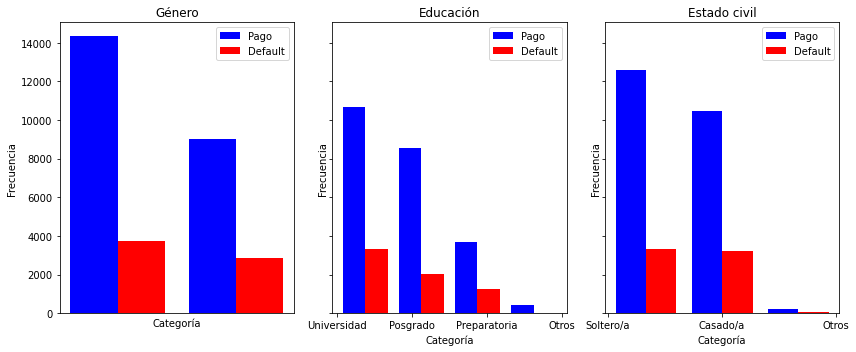

In [101]:
temp_df= df_clean[['X2', 'X3','X4','Y']]
temp_df.loc[:,'X2']= np.where(temp_df['X2']==2.0, 'Femenino', 'Masculino')
temp_df.loc[:,'X3']= np.where(temp_df['X3']==1.0, 'Posgrado', 
                              np.where(temp_df['X3']==2.0, 'Universidad', 
                                       np.where(temp_df['X3']==3.0, 'Preparatoria', 'Otros')))
temp_df.loc[:,'X4']= np.where(temp_df['X4']==1, 'Casado/a', 
                              np.where(temp_df['X4']==2, 'Soltero/a', 'Otros'))

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize=(12, 5))

axs[0].hist([temp_df[temp_df['Y']==0]['X2'], temp_df[temp_df['Y']==1]['X2']], 
            bins=2, label= ['Pago', 'Default'], color=['blue','red'])
axs[0].set_title("Género")
axs[0].set_xlabel('Categoría')
axs[0].set_ylabel('Frecuencia')
axs[0].legend()
axs[1].hist([temp_df[temp_df['Y']==0]['X3'], temp_df[temp_df['Y']==1]['X3']], 
            bins=4, color=['blue','red'],
            label= ['Pago', 'Default'])
axs[1].set_title("Educación")
axs[1].set_xlabel('Categoría')
axs[1].set_ylabel('Frecuencia')
axs[1].legend()
axs[2].hist([temp_df[temp_df['Y']==0]['X4'], temp_df[temp_df['Y']==1]['X4']], 
            bins=3, color=['blue','red'],
            label= ['Pago', 'Default'])
axs[2].set_title("Estado civil")
axs[2].set_xlabel('Categoría')
axs[2].set_ylabel('Frecuencia')
axs[2].legend()

De aquí podemos observar el incumplimiento vs el cumplimiento de pago para las distintas categorías de las 3 variables. Sin embargo, en general no se ve ninguna tendencia que nos indique que alguna categoría sea más pagadora que otra, ya que las proporciones se mantienen. 

Ahora vamos a revisar si encontramos alguna relación entre la edad y los pagos:

Text(27.125, 0.5, 'Incumplimiento de pago')

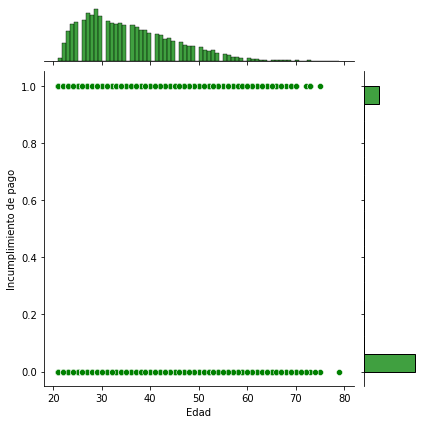

In [104]:
g= sns.jointplot(x ='X5',color ='green', y ='Y', data = df_clean)
g.ax_joint.set_xlabel('Edad')
g.ax_joint.set_ylabel('Incumplimiento de pago')

A simple vista pareciera que tampoco hay una tendencia de impago con respecto a la edad. Lo que sí es importante observar es que los usuarios de las tarjetas de crédito se acumulan principalmente entre edades de 25 y 35.

Por último, tenemos diagramas de caja y bigote para buscar diferencias importantes en variables que representan lo mismo pero que cambian de mes:



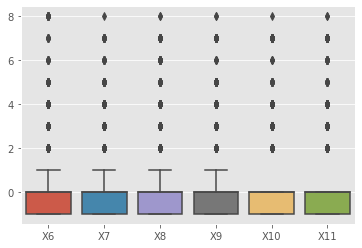

In [ ]:
ax = sns.boxplot(data=df_clean.iloc[:, 5:11])

El historial del estatus de pago se ve constante sobre todos los meses. Sólo en Abril (X6) y Mayo (X7) parece que no hubo tantas personas con un mes de retraso en sus pagos.

Con respecto al monto del estado de cuenta (X12-X17) no parece haber mucha diferencia, excepto en el mes de Abril (X17) 2005, donde parece que hubo más personas con balances negativos:

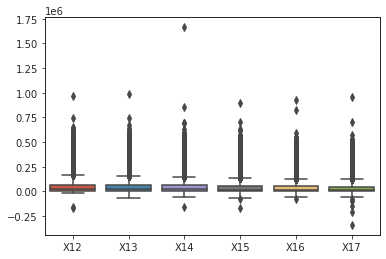

In [ ]:
ax = sns.boxplot(data=df_clean.iloc[:, 11:17])

- X18-X23: Monto del pago anterior (NT dollar). X18 = monto pagado en Septiembre, 2005; X19 = monto pagado en Agosto, 2005; . . .;X23 = monto pagado en Abril, 2005. 

Nuestra última gráfica, muestras los diagramas de caja del historial de los montos. Una observación importante es que en Agosto (X19) hubo valores atípicos de pagos más altos. Mientras que en los meses vecinos, es decir Septiembre (X18) y Julio (X20) también hubo pagos más altos de lo normal. 

Sería interesante saber por qué ocurrió eso en dichos meses, podría ser algo como que en México hay más pagos o gastos por el mes de mayo debido al pago de utilidades.

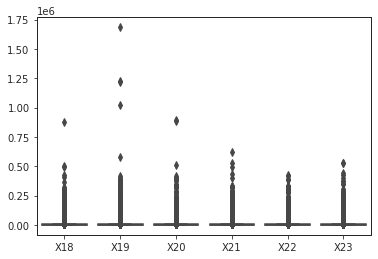

In [ ]:
ax = sns.boxplot(data=df_clean.iloc[:, 17:23])